In [3]:
import pandas as pd
import numpy as np
from pct.tree.heuristic.Heuristic import Heuristic5
from pct.tree.heuristic.NumericHeuristic import NumericHeuristic5
from pct.tree.splitter.splitter import Splitter
from pct.tree.tree import Tree
# from pct.tree.ftest.ftest import FTest


## From YXH's data process

In [4]:

from sklearn.preprocessing import LabelEncoder

# Load the u.data dataset
u_data = pd.read_csv('ml-100k/u.data', sep='\t', header=None, names=['user_id', 'item_id', 'rating', 'timestamp'])

# # # Perform label encoding on user_id and item_id
# user_encoder = LabelEncoder()
# item_encoder = LabelEncoder()

# u_data['user_id'] = user_encoder.fit_transform(u_data['user_id'])
# u_data['item_id'] = item_encoder.fit_transform(u_data['item_id'])

# # # Create the rating matrix
# n_users = u_data['user_id'].nunique()
# n_items = u_data['item_id'].nunique()

# Define the threshold
THRESHOLD = 3  # Ratings above this are "Lovers", below are "Haters"

# Pivot the data
rating_matrix = u_data.pivot(index='user_id', columns='item_id', values='rating').fillna(0)
rating_matrix.index = u_data['user_id'].unique()  # Ensure user_id alignment
rating_matrix.columns = u_data['item_id'].unique()  # Ensure item_id alignment


# Apply threshold classification to the rating matrix (after thresholding)
rating_matrix_thresholded = np.where(rating_matrix > THRESHOLD, 1, np.where(rating_matrix > 0, -1, 0))

# Convert numpy array to pandas DataFrame for easier inspection
rating_matrix_thresholded_df = pd.DataFrame(rating_matrix_thresholded)


In [ ]:
u_data

In [3]:
rating_matrix

242   302   377   51    346   474   265   465   451   86    ...  1594  \
196   5.0   3.0   4.0   3.0   3.0   5.0   4.0   1.0   5.0   3.0  ...   0.0   
186   4.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   2.0  ...   0.0   
22    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
244   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
166   4.0   3.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
939   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   5.0   0.0  ...   0.0   
936   0.0   0.0   0.0   2.0   0.0   0.0   4.0   5.0   3.0   0.0  ...   0.0   
930   5.0   0.0   0.0   0.0   0.0   0.0   4.0   0.0   0.0   0.0  ...   0.0   
920   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
941   0.0   5.0   0.0   0.0   0.0   0.0   0.0   0.0   3.0   0.0  ...   0.0   

     1626  1645  1659  1682  1674  1640  1637  1630  1641  
196   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
186   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
22    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
244   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
166   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...  
939   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
936   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
930   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
920   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
941   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[943 rows x 1682 columns]

## initiate tree and splitter

In [5]:
tree = Tree(min_instances=7)
tree.fit(rating_matrix, u_data['rating'], target_weights=None)




✅ Converted x and y to DataFrame
✅ Assigned x and y
✅ Creating target weights...
✅ Identifying numerical and categorical attributes...
✅ Creating Splitter...
Initializing Splitter...
✅ Calling build()...
🌲 Building predictive clustering tree...


/Users/camillecu/Downloads/KUL/master_thesis/master_thesis_github/thesis_github/lib/python3.9/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


🔍 Best item for splitting:  581
Type of x: <class 'pandas.core.frame.DataFrame'>
Shape of x: (943, 1682)
rI_subset:  {242: [(196, 5.0), (186, 4.0), (166, 4.0), (298, 4.0), (6, 4.0), (200, 3.0), (224, 1.0), (303, 5.0), (122, 4.0), (194, 5.0), (234, 3.0), (119, 5.0), (299, 5.0), (95, 5.0), (38, 3.0), (276, 5.0), (284, 4.0), (201, 5.0), (287, 5.0), (246, 4.0), (242, 5.0), (251, 2.0), (72, 4.0), (42, 4.0), (292, 5.0), (20, 5.0), (13, 2.0), (57, 2.0), (223, 3.0), (189, 4.0), (243, 3.0), (92, 3.0), (241, 3.0), (127, 4.0), (267, 4.0), (11, 2.0), (162, 4.0), (145, 5.0), (135, 4.0), (90, 4.0), (216, 4.0), (250, 4.0), (271, 2.0), (58, 5.0), (128, 4.0), (44, 5.0), (264, 4.0), (41, 5.0), (82, 5.0), (262, 4.0), (43, 4.0), (269, 3.0), (259, 3.0), (49, 4.0), (68, 4.0), (172, 4.0), (130, 4.0), (56, 4.0), (15, 4.0), (52, 3.0), (161, 4.0), (83, 4.0), (151, 5.0), (54, 4.0), (294, 5.0), (70, 3.0), (14, 4.0), (214, 3.0), (307, 4.0), (297, 3.0), (275, 4.0), (218, 4.0), (123, 5.0), (154, 5.0), (77, 4.0), (18

/Users/camillecu/Downloads/KUL/master_thesis/master_thesis_github/pct/tree/node/node.py:62: RuntimeWarning: invalid value encountered in divide
  prototype /= np.sum(
/Users/camillecu/Downloads/KUL/master_thesis/master_thesis_github/thesis_github/lib/python3.9/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


🔍 Best item for splitting:  581
Type of x: <class 'pandas.core.frame.DataFrame'>
Shape of x: (942, 1682)
rI_subset:  {242: [(196, 5.0), (186, 4.0), (166, 4.0), (298, 4.0), (200, 3.0), (224, 1.0), (303, 5.0), (122, 4.0), (194, 5.0), (234, 3.0), (119, 5.0), (299, 5.0), (95, 5.0), (38, 3.0), (276, 5.0), (284, 4.0), (201, 5.0), (287, 5.0), (246, 4.0), (242, 5.0), (251, 2.0), (72, 4.0), (42, 4.0), (292, 5.0), (20, 5.0), (13, 2.0), (57, 2.0), (223, 3.0), (189, 4.0), (243, 3.0), (92, 3.0), (241, 3.0), (127, 4.0), (267, 4.0), (11, 2.0), (162, 4.0), (145, 5.0), (135, 4.0), (90, 4.0), (216, 4.0), (250, 4.0), (271, 2.0), (58, 5.0), (128, 4.0), (44, 5.0), (264, 4.0), (41, 5.0), (82, 5.0), (262, 4.0), (43, 4.0), (269, 3.0), (259, 3.0), (49, 4.0), (68, 4.0), (172, 4.0), (130, 4.0), (56, 4.0), (15, 4.0), (52, 3.0), (161, 4.0), (83, 4.0), (151, 5.0), (54, 4.0), (294, 5.0), (70, 3.0), (14, 4.0), (214, 3.0), (307, 4.0), (297, 3.0), (275, 4.0), (218, 4.0), (123, 5.0), (154, 5.0), (77, 4.0), (187, 4.0), (

/Users/camillecu/Downloads/KUL/master_thesis/master_thesis_github/pct/tree/node/node.py:62: RuntimeWarning: invalid value encountered in divide
  prototype /= np.sum(


🔍 Best item for splitting:  None
🍃 Creating leaf node (no valid split found)...
🌲 Building predictive clustering tree...


/Users/camillecu/Downloads/KUL/master_thesis/master_thesis_github/thesis_github/lib/python3.9/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


🔍 Best item for splitting:  581
Type of x: <class 'pandas.core.frame.DataFrame'>
Shape of x: (942, 1682)
rI_subset:  {242: [(196, 5.0), (186, 4.0), (166, 4.0), (298, 4.0), (200, 3.0), (224, 1.0), (303, 5.0), (122, 4.0), (194, 5.0), (234, 3.0), (119, 5.0), (299, 5.0), (95, 5.0), (38, 3.0), (276, 5.0), (284, 4.0), (201, 5.0), (287, 5.0), (246, 4.0), (242, 5.0), (251, 2.0), (72, 4.0), (42, 4.0), (292, 5.0), (20, 5.0), (13, 2.0), (57, 2.0), (223, 3.0), (189, 4.0), (243, 3.0), (92, 3.0), (241, 3.0), (127, 4.0), (267, 4.0), (11, 2.0), (162, 4.0), (145, 5.0), (135, 4.0), (90, 4.0), (216, 4.0), (250, 4.0), (271, 2.0), (58, 5.0), (128, 4.0), (44, 5.0), (264, 4.0), (41, 5.0), (82, 5.0), (262, 4.0), (43, 4.0), (269, 3.0), (259, 3.0), (49, 4.0), (68, 4.0), (172, 4.0), (130, 4.0), (56, 4.0), (15, 4.0), (52, 3.0), (161, 4.0), (83, 4.0), (151, 5.0), (54, 4.0), (294, 5.0), (70, 3.0), (14, 4.0), (214, 3.0), (307, 4.0), (297, 3.0), (275, 4.0), (218, 4.0), (123, 5.0), (154, 5.0), (77, 4.0), (187, 4.0), (

/Users/camillecu/Downloads/KUL/master_thesis/master_thesis_github/pct/tree/node/node.py:62: RuntimeWarning: invalid value encountered in divide
  prototype /= np.sum(


In [4]:
tree.print_tree_structure()

Node: 580_1
Attribute: 580
Criterion: [0.]
Leaf Node: No
Children:
    Node: leaf_2=[4.] (1.0)
    Attribute: None
    Criterion: None
    Leaf Node: No
    Children:
        Node: 580_1
        Attribute: 580
        Criterion: [0.]
        Leaf Node: No
        Children:
        Node: 580_1
        Attribute: 580
        Criterion: [0.]
        Leaf Node: No
        Children:
        Node: 580_1
        Attribute: 580
        Criterion: [0.]
        Leaf Node: No
        Children:
    Node: leaf_3=[nan] (0.0)
    Attribute: None
    Criterion: None
    Leaf Node: No
    Children:
        Node: 580_1
        Attribute: 580
        Criterion: [0.]
        Leaf Node: No
        Children:
        Node: 580_1
        Attribute: 580
        Criterion: [0.]
        Leaf Node: No
        Children:
        Node: 580_1
        Attribute: 580
        Criterion: [0.]
        Leaf Node: No
        Children:
    Node: 580_4
    Attribute: 580
    Criterion: [0.]
    Leaf Node: No
    Children:
   

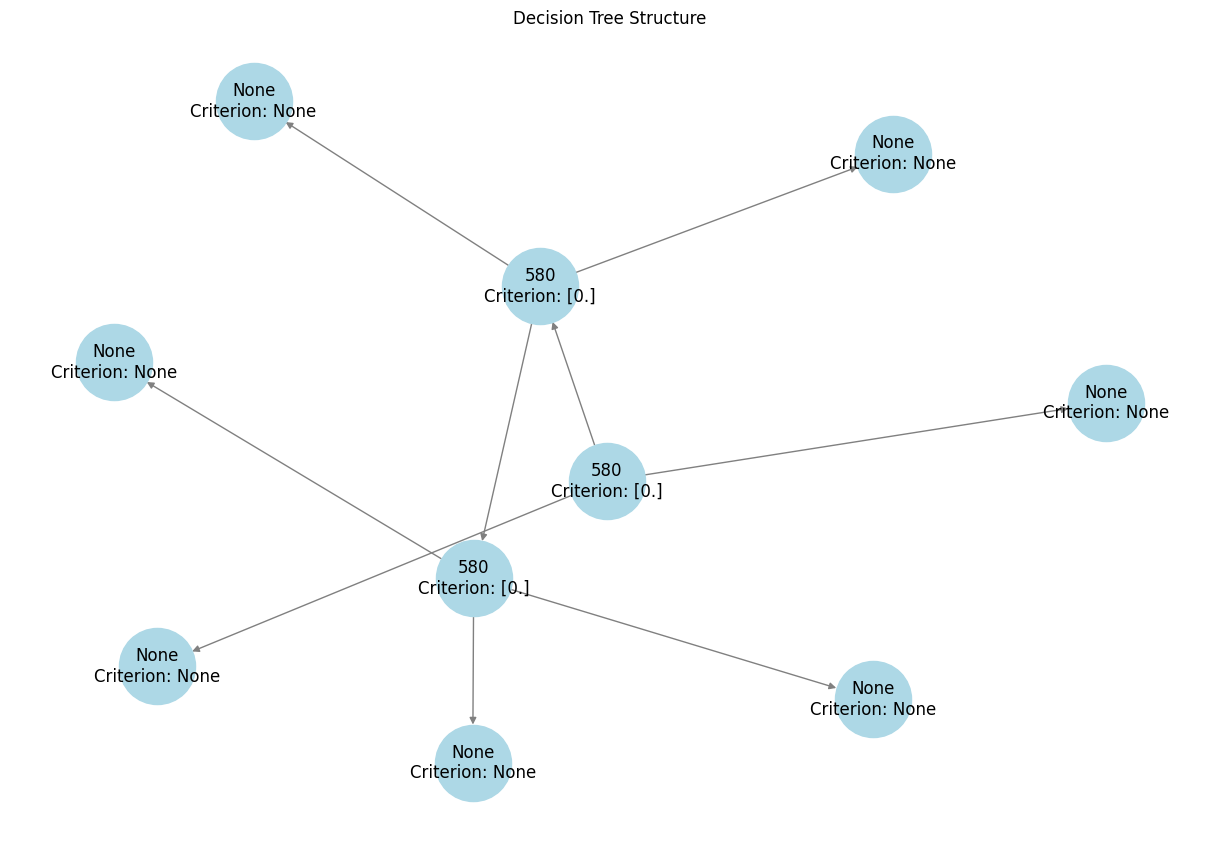

In [4]:
tree.visualize_tree()


## create rI and rU during preprocessing phase

In [ ]:

# Create rI and rU indexes for training set (R)
# rI: item to user ratings (dictionary of items with lists of user ratings)
rI = {}
for _, row in u_data.iterrows():
    item_id = row['item_id']
    user_id = row['user_id']
    rating = row['rating']
    if item_id not in rI:
        rI[item_id] = []
    rI[item_id].append((user_id, rating))

# rU: user to item ratings (dictionary of users with lists of item ratings)
rU = {}
for _, row in u_data.iterrows():
    user_id = row['user_id']
    item_id = row['item_id']
    rating = row['rating']
    if user_id not in rU:
        rU[user_id] = []
    rU[user_id].append((item_id, rating))

In [ ]:
# Optionally, print rI and rU to check the data structure for training and testing
print("\nSample rI (item to user ratings) for Training Set:")
for item in list(rI.keys())[:2]:  # Display sample item indices
    print(f"Item {item}: {rI[item]}")

print("\nSample rU (user to item ratings) for Training Set:")
for user in list(rU.keys())[:2]:  # Display sample user indices
    print(f"User {user}: {rU[user]}")

In [ ]:
# find and count users who have rated item 246 and their ratings
item_id = 55
print(f"Users who have rated item {item_id} and their ratings:")
print(rI[item_id])

# count users who have rated item 246 and their ratings
print(f"Number of users who have rated item {item_id}: {len(rI[item_id])}")

In [ ]:

print(f"Number of users who didn't rate item {item_id}:")
print(n_users - len(rI[item_id]))

In [3]:
# Define parameters for Splitter
min_instances = 7  # Change this based on your needs
numerical_attributes = rating_matrix_thresholded_df.columns  # Items as numerical attributes
categorical_attributes = []  # No categorical attributes in this case
target_weights = np.ones_like(rating_matrix_thresholded_df)  # Dummy weights

# Initialize Splitter instance
splitter = Splitter(min_instances, numerical_attributes, categorical_attributes, target_weights)

# Dummy target variable (y), assuming ratings are targets
y = rating_matrix_thresholded_df.copy()

# Instance weights (default: all ones)
instance_weights = np.ones(y.shape[0])

# Call the find_best_split_item function
best_item, total_error = splitter.find_best_split_item(rating_matrix_thresholded_df, y, instance_weights)

# Print the result
print(f"Best item for splitting: {best_item}")
print(f"Total error for best item: {total_error}")


Initializing Splitter...
Item ID:  0 Total Error:  [413]
Item ID:  1 Total Error:  [130]
Item ID:  2 Total Error:  [89]
Item ID:  3 Total Error:  [207]
Item ID:  4 Total Error:  [85]
Item ID:  5 Total Error:  [25]
Item ID:  6 Total Error:  [372]
Item ID:  7 Total Error:  [210]
Item ID:  8 Total Error:  [282]
Item ID:  9 Total Error:  [88]
Item ID:  10 Total Error:  [225]
Item ID:  11 Total Error:  [225]
Item ID:  12 Total Error:  [183]
Item ID:  13 Total Error:  [175]
Item ID:  14 Total Error:  [285]
Item ID:  15 Total Error:  [38]
Item ID:  16 Total Error:  [91]
Item ID:  17 Total Error:  [9]
Item ID:  18 Total Error:  [67]
Item ID:  19 Total Error:  [71]
Item ID:  20 Total Error:  [80]
Item ID:  21 Total Error:  [267]
Item ID:  22 Total Error:  [169]
Item ID:  23 Total Error:  [173]
Item ID:  24 Total Error:  [292]
Item ID:  25 Total Error:  [72]
Item ID:  26 Total Error:  [56]
Item ID:  27 Total Error:  [259]
Item ID:  28 Total Error:  [108]
Item ID:  29 Total Error:  [36]
Item ID: 